# Data visualization

:::{note}
The previous `echopype.visualize` subpackage is removed at v0.9.0. 
See below for how you can do the same quick plots using native xarray plotting functionalities (and learn more about them [here](https://docs.xarray.dev/en/latest/user-guide/plotting.html)).
The EK500 colormap is now accessed through the `colormap` subpackage.
:::

:::{tip}
Note that you need have [`matplotlib`](https://pypi.org/project/matplotlib/) and [`cmocean`](https://pypi.org/project/cmocean/) libraries in your environment for plotting and accessing custom colormaps, along with all the wonderful colormap that `cmocean` provides.:::

## Plotting a simple echogram

We can directly plot Sv data using xarray functionality!

In [1]:
import echopype as ep

# Grab one file from the OOI file server
raw_url ="https://rawdata.oceanobservatories.org/files/CE04OSPS/PC01B/ZPLSCB102_10.33.10.143/2017/08/21/OOI-D20170821-T163049.raw"

# Convert the raw file into an EchoDat object
echodata = ep.open_raw(raw_file=raw_url, sonar_model="EK60")

# Calibrate the raw data to volume backscattering volume (Sv)
ds_Sv = ep.calibrate.compute_Sv(echodata, waveform_mode="CW", encode_mode="power")

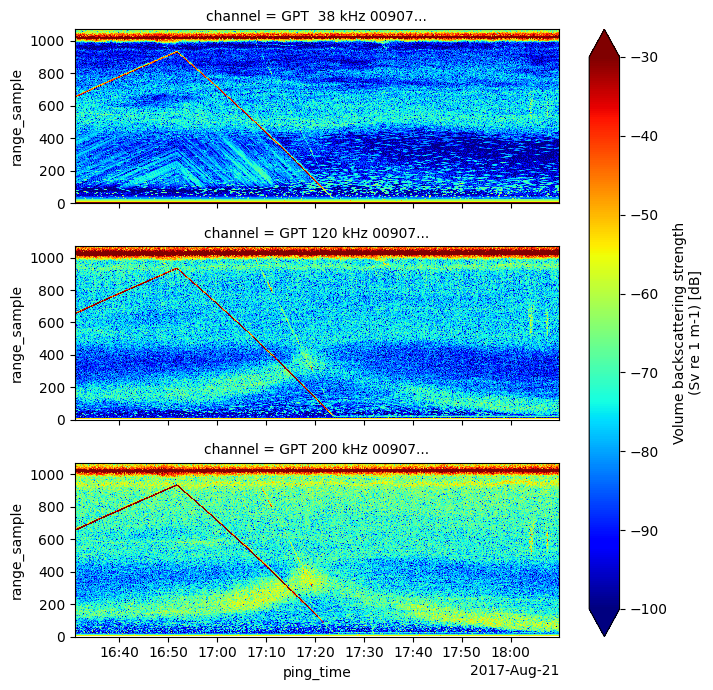

In [24]:
# Plot all 3 channels for inspection
ds_Sv["Sv"].plot(
    x="ping_time",
    row="channel",
    figsize=(7, 7),
    vmin=-100, 
    vmax=-30,
    cmap="jet"
)

## Colormap

The `colormap` subpackage provides a custom `EK500` colormap that is widely used fisheries acoustics echogram visualization. We plan to add other colormaps into this subpackage in the near future.

In [18]:
import echopype.colormap  # make custom colormap available

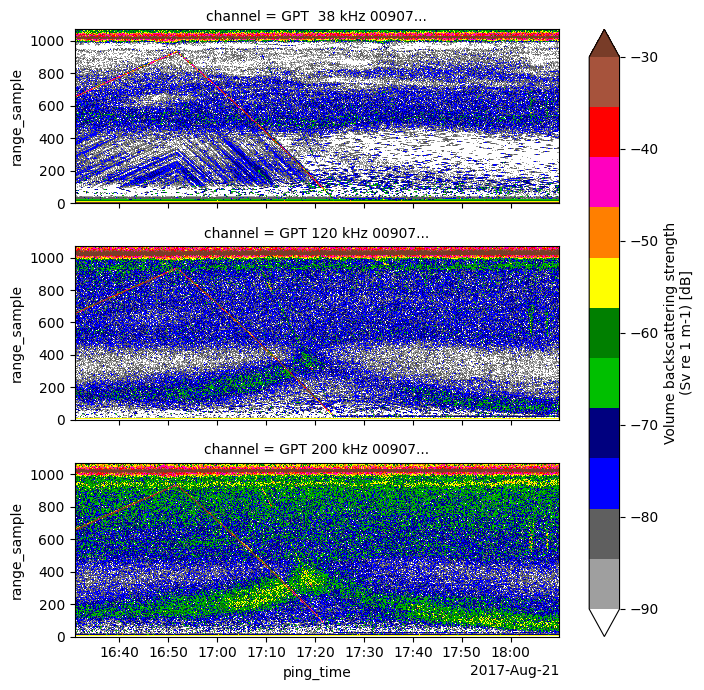

In [23]:
# Plot all 3 channels for inspection
ds_Sv["Sv"].plot(
    x="ping_time",
    row="channel",
    figsize=(7, 7),
    vmin=-90, 
    vmax=-30,
    cmap="ep.ek500"  # use the custom EK500 colormap
)

Comparing the `Jet` and `EK500` colormap, you can see that certain echogram features stand out more with `EK500`. However, but careful about these rainbow-color type of colormaps, because our perception of different colors can often skews what we think is the most prominent features in an echogram.

For a good analysis for echogram colormaps, checkout these very interesting articles:
- Blackwell et al. (2019). Colour maps for fisheries acoustic echograms. {cite:p}`Blackwell2019`
- Peña. (2023). Full customization of color maps for fisheries acoustics: Visualizing every target. {cite:p}`Pena2021`

Echopype provides a way to quickly plot your data that has been converted with `open_raw`, or preprocessed as either `Sv` or `MVBS`. The visualize module in echopype will need the optional `plot` packages to be installed within your python environment. In order to do this, you need to specify `[plot]` during the installation of echopype.

```bash
pip install echopype[plot]
```

This installation includes [`matplotlib`](https://pypi.org/project/matplotlib/) and [`cmocean`](https://pypi.org/project/cmocean/) libraries for plotting and providing you with a custom `EK500` colormap along with all the wonderful colormap that `cmocean` provides.

```{figure} ./_static/ek500.png
:name: ek500

Comparison of `Jet` and `EK500` colormap. You can see the zooplankton within the echogram better with the `EK500`.
```

## The visualize module

To start utilizing the visualization module you can import the module by importing `echopype.visualize`.

```python
import echopype.visualize as epviz
```

The visualize module contains a single useful function called [`create_echogram`](api.html#module-echopype.visualize).

`create_echogram` can take both echodata or xarray dataset objects, and contains many other inputs to plot certain frequencies,
auto compute range, and add water level.

## Visualization demo

Below is an example of quick plotting for one of the OOI raw dataset used in the [Moored Echosounder Example notebook](https://osoceanacoustics.github.io/echopype-examples/ms_OOI_EK60_mooringtimeseries.html).

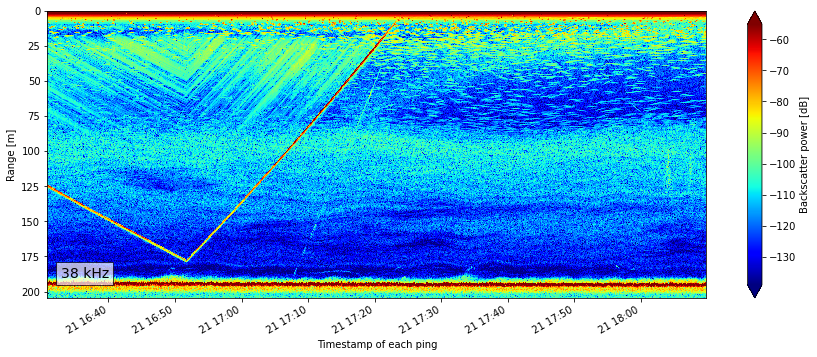

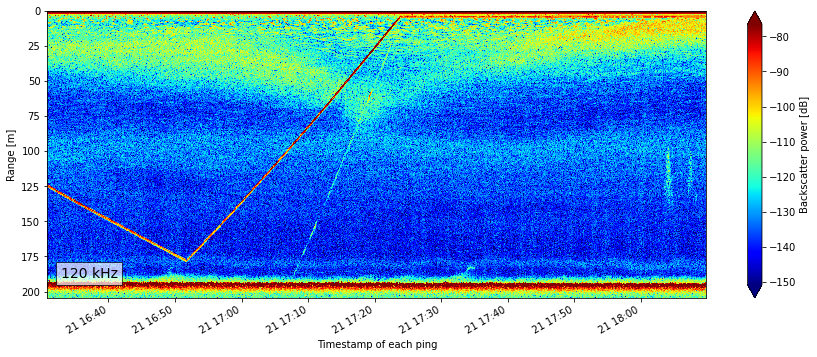

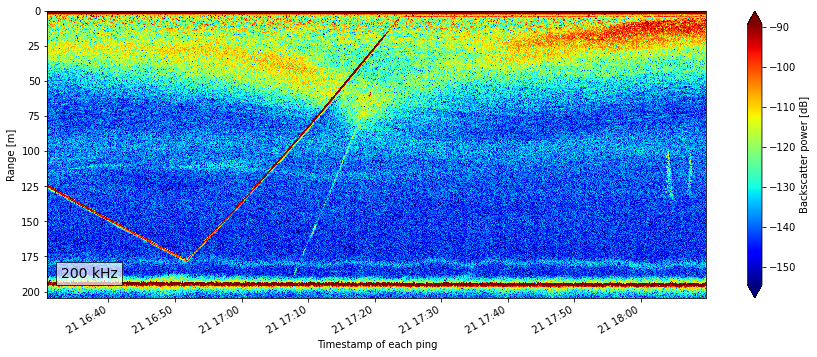

In [2]:
# Quickly look at all of the frequency,
# calculate range on the fly,
# and color the data based on the actual data range available.
epviz.create_echogram(echodata, get_range=True, robust=True)

From a quick look at the plot we can quickly tell that this is upside down, and therefore the data need to be flipped since this is coming from an echosounder that is upside down on a platform around 200m depth. For the purpose of this demo, we are not going to do that flipping. See the [Moored Echosounder Example notebook](https://osoceanacoustics.github.io/echopype-examples/ms_OOI_EK60_mooringtimeseries.html) for more detail on this dataset.